# Project 02 - Due Friday, October 13 at 12pm

*Objectives*: Design a relational database schema for transaction processing. Use SQL to load the data into the database and retrieve information from the database.

*Grading criteria*: The tasks should all be completed, and questions should all be answered with SQL queries, shell commands, diagrams and markdown cells.  The notebook itself should be completely reproducible (using AWS EC2 instance based on the provided AMI) from start to finish; another person should be able to use the code to obtain the same results as yours.  Note that you will receive no more than partial credit if you do not add text/markdown cells explaining your thinking at each major step in each problem.

*Attestation*: **Work in groups**.  At the end of your submitted notebook, identify the work each partner performed and attest that each contributed substantially to the work.

*Deadline*: Friday, October 13, 12pm.  One member of each group must submit your notebook to Blackboard; you should not submit it separately.

## Part 1 - Requirements

The city is going to launch a new bike sharing system. Your task is to design a relational database to support its operation. The bike sharing system works as follows:

1. Riders can buy annual, semiannual or monthly membership. We need to have a record of each member's name and address in order to send them a key. Keys can be used to check out bikes at any bike station. Members have the option to renew their memberships before they expire. A member becomes inactive when his or her membership expires, therefore we need to know when their memberships expire. 

1. Each bike station has a pubic name (i.e. "18th & C St NW"). Occasionally in response to public requests, stations can be renamed. Each bike station have been built with a number of docking points.

1. Each bike is either serviceable or disabled. If it is disabled, it is removed from the station for repair.

1. For simplicity's sake, each serviceable bike is either docked at a station or checked out by a member. If it is checked out by a member, the system needs to know who has checked it out and when.

Your database should minimally support the above requirements.

## Part 2 - Designing a Database Schema (35 points)

Based on what you read above, design a relational database schema consisting of *at least* 3 tables. Document your schema with a schema diagram.  There are several tools available for this, such as [Google Drawings](https://docs.google.com/drawings/) and Microsoft Visio. Make sure to include the schema diagram in your submission. Embed and display the diagram in your notebook. **Discuss your major design decisions.** Be aware that your schema is designed to support transaction processing and should be optimized for writes and data consistency.

We are looking for the following when grade this part of the project:

* All required attributes are recorded.
* In the schema diagram, all primary keys are underlined. Directed lines are drawn from the foreign keys to the primary keys.
* Your database schema should be designed to promite data consistency and integrity and reduce the duplication of data. Strive for 3NF.
* Your database schema should be designed to support the requirements described in Part 1, as well as problems in Part 4 and 5.
* Key design decisions are discussed and documented in Markdown cells.

See slide 23 of week-04 lecture for an example of schema diagram. 

Our schema diagram:

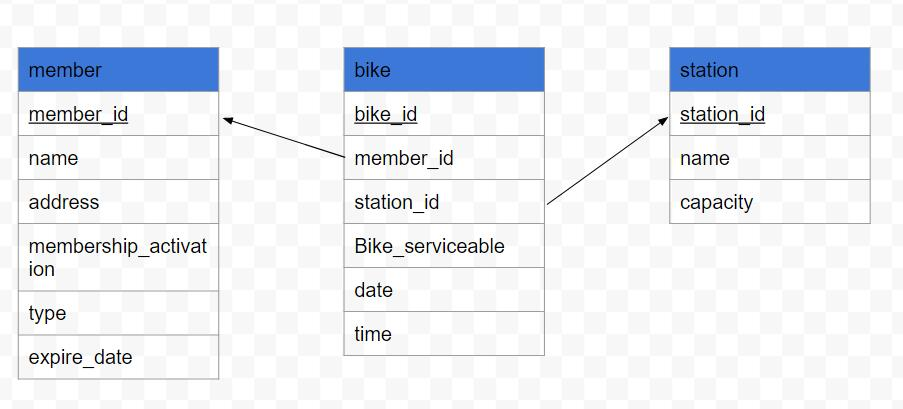

In [1]:
from IPython.display import Image
Image(filename = "SQL.jpg")

Member relationship has a primary key (member_id), and attributes (name, address, membership status, member type, expire date of membership) of each member.

Bike relationship has a primary key (bike_id), two foreign keys refer to member_id in member table and to station_id in station table, respectively, and attributes (Bike_serviceable, date, time) of each bike.

Station relationship has and attributes (station) and attributes (name and capacity) of each station.

## Part 3 - ETL (30 points)
Please use markdown cells to **document major steps**. Use SQL queries and markdown cells to demonstrate that records are created or updated successfully.

### Problem 3.1
Examine the data located at https://s3.amazonaws.com/dmfa-2017/bike_stations.csv.
Create and connect to a new PostgreSQL database named `proj2`. Use SQL DDL to create your tables in it based on the database schema you designed in Part 2 and the data. Don't forget about the contraints (primary keys, foreign keys, proper attribute types, NOT NULL etc).

First, drop the database named `proj2` if it exists. It is necessary so that we can run this notebook repeatedly. If you get the error that says "database proj2 does not exist", that is fine. However if it complains that "There is 1 other session using the database", please restart the Kernel and try it again.

In [2]:
!dropdb -U student proj2

In [3]:
!createdb -U student proj2

In [4]:
%load_ext sql

In [5]:
%sql postgresql://student@/proj2

'Connected: student@proj2'

Create "member" relationship.

In [6]:
%%sql
DROP TABLE IF EXISTS member;

CREATE TABLE member 
(
    member_id serial PRIMARY KEY,
    name TEXT,
    address TEXT,
    membership_activation BOOL,
    type TEXT,
    expire_date DATE
);

Done.
Done.


[]

Create "station" relationship.

In [7]:
%%sql
DROP TABLE IF EXISTS station;

CREATE TABLE station 
(
    station_id INTEGER PRIMARY KEY,
    name TEXT UNIQUE,
    capacity INTEGER

);

Done.
Done.


[]

In [8]:
%%sql
DROP TABLE IF EXISTS bike;

CREATE TABLE bike 
(
    bike_id VARCHAR(10) PRIMARY KEY,
    member_id INTEGER,
    station_id INTEGER,
    Bike_serviceable BOOL,
    date DATE,
    time TIME,
        CONSTRAINT bike_member_id_fkey FOREIGN KEY (member_id)
        REFERENCES member (member_id) MATCH SIMPLE,
        
        CONSTRAINT bike_station_id_fkey FOREIGN KEY (station_id)
        REFERENCES station (station_id) MATCH SIMPLE
        
    

);

Done.
Done.


[]

See the table we create.

In [9]:
%sql select * from bike;

0 rows affected.


bike_id,member_id,station_id,bike_serviceable,date,time


In [10]:
%sql select * from station;

0 rows affected.


station_id,name,capacity


In [11]:
%sql select * from member;

0 rows affected.


member_id,name,address,membership_activation,type,expire_date


They are empty since we have not inserted any data yet.

### Problem 3.2
Use the data located at https://s3.amazonaws.com/dmfa-2017/bike_stations.csv to populate your database. You may import the CSV file content into a temporary table in your database `proj2`. Just remember to remove it after you are done. 

Since the data doesn't include information about members, you will need to make up a few (4 or 5) members in your database. Some of their memberships have expired.

Create temporary table.

In [12]:
%%sql
DROP TABLE IF EXISTS temp;

CREATE TABLE temp 
(
    Bike_number     TEXT,
    Bike_serviceable BOOL,
    Station_number   INTEGER,
    Station_name     TEXT,
    Station_capacity INTEGER
);

Done.
Done.


[]

In [13]:
%sql select * from temp;

0 rows affected.


bike_number,bike_serviceable,station_number,station_name,station_capacity


Import data from csv file into temporary table.

In [14]:
%%sql
COPY temp FROM '/home/ubuntu/project2/bike_stations.csv'
CSV
HEADER;

4317 rows affected.


[]

In [15]:
%sql select * from temp;

4317 rows affected.


bike_number,bike_serviceable,station_number,station_name,station_capacity
W00005,True,32011,Maple & Ritchie Ave,28
W00174,True,31246,M St & Pennsylvania Ave NW,10
W00196,True,31408,Takoma Metro,12
W00216,True,31309,Fessenden St & Wisconsin Ave NW,8
W00267,True,31125,15th & W St NW,24
W00310,True,31056,S Troy St & 26th St S,9
W00338,True,31244,4th & E St SW,19
W00388,True,32023,Montgomery College/W Campus Dr & Mannakee St,8
W00403,True,31217,USDA / 12th & Independence Ave SW,10
W00409,True,31402,14th St Heights / 14th & Crittenden St NW,6


In [16]:
%%sql
INSERT INTO station
SELECT DISTINCT station_number,station_name,station_capacity
FROM temp
WHERE station_number IS NOT NULL;

452 rows affected.


[]

In [17]:
%%sql
SELECT * FROM station;

452 rows affected.


station_id,name,capacity
31221,18th & M St NW,13
31287,10th St & L'Enfant Plaza SW,8
31507,1st & Washington Hospital Center NW,8
31119,14th & Belmont St NW,14
32010,Philadelphia & Maple Ave,28
31501,12th & Newton St NE,5
31313,Connecticut Ave & Tilden St NW,8
32034,Ripley & Bonifant St,8
31603,1st & M St NE,17
31909,Mount Vernon Ave & Four Mile Run Park,13


Insert data into bike relationship.

In [18]:
%%sql
INSERT INTO bike(bike_id, station_id,Bike_serviceable)
SELECT bike_number,station_number,bike_serviceable
FROM temp
WHERE bike_number IS NOT NULL;

4298 rows affected.


[]

In [19]:
%%sql
SELECT * 
FROM bike;

4298 rows affected.


bike_id,member_id,station_id,bike_serviceable,date,time
W00005,None,32011,True,None,None
W00174,None,31246,True,None,None
W00196,None,31408,True,None,None
W00216,None,31309,True,None,None
W00267,None,31125,True,None,None
W00310,None,31056,True,None,None
W00338,None,31244,True,None,None
W00388,None,32023,True,None,None
W00403,None,31217,True,None,None
W00409,None,31402,True,None,None


Insert data into member relationship.

In [20]:
%%sql
COPY member(name,address,membership_activation,type,expire_date)
FROM '/home/ubuntu/project2/member.csv'
CSV;

5 rows affected.


[]

In [21]:
%%sql
SELECT *
FROM member;

5 rows affected.


member_id,name,address,membership_activation,type,expire_date
1,XinranTao,"CA,USA",True,annual,2018-01-01
2,JiafengXu,"MD,USA",False,monthly,2017-10-01
3,LeiwenLin,"MA,USA",False,semiannual,2016-12-31
4,HuitingTang,"NY,USA",True,annual,2019-04-01
5,Daniel Chudnov,"DC,USA",True,semiannual,2018-02-01


Delete temp table

In [22]:
%%sql
DROP TABLE  temp;

Done.


[]

## Part 4 - Operations (15 points)
Use SQL queries and markdown cells to demonstrate that records are created or updated successfully.

### Problem 4.1
The bike 'W20131' is having mechanical problems and needs to be repaired off-site. Use SQL UPDATE statements to record the fact that this bike is no longer serviceable and has been removed from the station where it was docked at.

In [23]:
%%sql
START TRANSACTION;
UPDATE bike SET bike_serviceable=False WHERE bike_id='W20131';
UPDATE bike SET station_id = Null WHERE bike_id='W20131';
COMMIT;

Done.
1 rows affected.
1 rows affected.
Done.


[]

Use update to change the values for bike_serviceable and station_id for the bike.bike_id is VARCHAR instead of an integer because it starts with a letter.

Let's see if it is updated?

In [24]:
%%sql
SELECT *
FROM bike
WHERE bike_id='W20131';

1 rows affected.


bike_id,member_id,station_id,bike_serviceable,date,time
W20131,None,None,False,None,None


### Problem 4.2
The bike station at Adams Mill & Columbia Rd NW has been expanded. Use SQL UPDATE statements to change the name of the bike station from "Adams Mill & Columbia Rd NW" to "18th & Columbia Rd NW" and increase its capacity by 10.

In [28]:
%%sql
SELECT station_id,capacity
FROM station
WHERE name ='Adams Mill & Columbia Rd NW';

1 rows affected.


station_id,capacity
31104,4


We found the primary key station id of '18th & Columbia Rd NW' is 31104.

In [25]:
%%sql
START TRANSACTION;
UPDATE station SET name='18th & Columbia Rd NW',capacity=capacity+10 
WHERE station_id=31104;
COMMIT;

Done.
1 rows affected.
Done.


[]

Use update to change the station name and increase the capacity. Since capacity is an integer, we can add 10 directly. 

See the updated data.

In [27]:
%%sql
SELECT *
FROM station
WHERE station_id=31104;

1 rows affected.


station_id,name,capacity
31104,18th & Columbia Rd NW,14


### Problem 4.3
Use SQL UPDATE and/or INSERT statements to record the transaction that an active member checked out the bike 'W00005' from station 'Maple & Ritchie Ave' at '2017-10-01 08:46:00'.

See unupdated data.

In [28]:
%%sql
SELECT *
FROM bike,station
WHERE bike.station_id = station.station_id AND bike.bike_id = 'W00005';

1 rows affected.


bike_id,member_id,station_id,bike_serviceable,date,time,station_id_1,name,capacity
W00005,None,32011,True,None,None,32011,Maple & Ritchie Ave,28


The bike "W00005" is at station Maple & Ritchie Ave (id: 32011) now.

Let's update the data.

In [29]:
%%sql
UPDATE bike SET member_id=5, station_id = Null,bike_serviceable=TRUE,date='2017-10-01',time='08:46:00'
WHERE bike_id = 'W00005';


1 rows affected.


[]

See updated data.

In [30]:
%%sql
SELECT *
FROM bike
LEFT JOIN station ON bike.station_id=station.station_id 
WHERE bike_id = 'W00005';

1 rows affected.


bike_id,member_id,station_id,bike_serviceable,date,time,station_id_1,name,capacity
W00005,5,None,True,2017-10-01,08:46:00,None,None,None


The data has been updated.

Use update to set a member_id, station_id, date and time. Since date and time are in formats of date and time, our input is strictly alligned with the requirement.

## Part 5 - Queries (20 points)

Use SQL SELECT statements to answer the following questions. Use markdown cells to explain your SQL statements and results if needed.

### Problem 5.1
For all members, display their name, membership type (annual, semiannual or monthly, in readable text), membership status (active or expired, boolean value is fine) and the date when the membership expires.

In [31]:
%%sql
SELECT DISTINCT name, type, membership_activation,expire_date
FROM member;

5 rows affected.


name,type,membership_activation,expire_date
Daniel Chudnov,semiannual,True,2018-02-01
HuitingTang,annual,True,2019-04-01
LeiwenLin,semiannual,False,2016-12-31
XinranTao,annual,True,2018-01-01
JiafengXu,monthly,False,2017-10-01


Use SELECT DISTINCT to find specific columns from the table named member. The column namedmembership_activation is a boolean value contains True and False, while expire_date is a time variable. Name and type are characters that contains infomation of the member table.

### Problem 5.2
Display the first 10 bikes base on the bike number in ascending order. For each bike, list its status (serviceable or disabled, boolean value is fine), the station name where it is docked at if there is any, the member if the bike is currently checked out, and when it was checked out. Hint: you should see one disabled bike and one checked out bike.

In [32]:
%%sql
SELECT bike.bike_id,bike.Bike_serviceable,station.name,bike.member_id,member.name as member_name,bike.date
FROM bike
LEFT JOIN station ON bike.station_id=station.station_id 
LEFT JOIN member ON member.member_id=bike.member_id
ORDER BY bike.bike_id ASC 
LIMIT 10;

10 rows affected.


bike_id,bike_serviceable,name,member_id,member_name,date
W00001,True,Ward Circle / American University,None,None,None
W00005,True,None,5,Daniel Chudnov,2017-10-01
W00007,True,Gallaudet / 8th St & Florida Ave NE,None,None,None
W00009,True,Mount Vernon Ave & Bruce St,None,None,None
W00010,True,Jefferson Memorial,None,None,None
W00011,False,None,None,None,None
W00012,True,Wilson Blvd & N Illinois St,None,None,None
W00013,True,Lee Center,None,None,None
W00014,True,Wilson Blvd & N Illinois St,None,None,None
W00015,True,Saint Asaph St & Pendleton St,None,None,None


Use Select to find all columns related to the question. Then, join two tables named station and bike by the common values named station_id. To display the output as asked, we used ORDER BY to place bike_id in ascending order. Last, limit the number of displayed rows to be 10.

### Problem 5.3
Display the top 10 stations which currently have the most bikes docked. For each station, list the station name and the total number of bikes docked there.

In [33]:
%%sql
SELECT station.name,COUNT(bike.bike_id) AS total_number_docked
FROM station, bike
WHERE station.station_id=bike.station_id
GROUP BY station.station_id
ORDER BY total_number_docked DESC 
LIMIT 10;

10 rows affected.


name,total_number_docked
Columbus Circle / Union Station,49
14th & V St NW,41
2nd & G St NE,36
13th & D St NE,33
12th & U St NW,32
11th & Kenyon St NW,29
1st & N St SE,28
4th & M St SW,27
6th & H St NE,27
13th & H St NE,27


We can find the number of bikes docked in a station by counting the number of rows (indicates bike_id) in the bike table where the corresponding station_id matches that in the station table. Thus, we selected station names and counted bike_id by joining two tables via station_id. By grouping the results based on station_id and ordering by the counts, we got stations names and corresponding docked numbers. The output contains the top ten stations with the most docked bikes. 

### Problem 5.4
Display the first 10 stations based on their names in ascending order. For each station, list station name and the number of available docking points accepting bike returns. Verify the numbers are correct.

In [34]:
%%sql
SELECT station.name,station.capacity-COUNT(bike.bike_id) AS availability
FROM station, bike
WHERE station.station_id=bike.station_id
GROUP BY station.station_id
ORDER BY station.name ASC
LIMIT 10;

10 rows affected.


name,availability
10th & E St NW,2
10th & Florida Ave NW,5
10th & G St NW,8
10th & K St NW,6
10th & Monroe St NE,2
10th St & Constitution Ave NW,5
10th St & L'Enfant Plaza SW,7
10th & U St NW,2
11th & F St NW,2
11th & H St NE,3


We can find the availability in a station by subtracting the counts in the above question from station capacity. Thus, we selected station names and named the subtractions as availability. By grouping the results based on station_id and ordering by station names in ascending order, we got stations names and corresponding availability numbers. 